In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder

In [46]:
df = pd.read_csv('Salary_dataset.csv')
df['YearsExperience'] = df['YearsExperience'].astype(int)
df

,Unnamed: 0,YearsExperience,Salary
0,0,1,39344.0
1,1,1,46206.0
2,2,1,37732.0
3,3,2,43526.0
4,4,2,39892.0
5,5,3,56643.0
6,6,3,60151.0
7,7,3,54446.0
8,8,3,64446.0
9,9,3,57190.0


In [47]:
dummies = pd.get_dummies(df.YearsExperience)
dummies

,1,2,3,4,5,6,7,8,9,10
0,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False
6,False,False,True,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False
8,False,False,True,False,False,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False


In [48]:
merged = pd.concat([df,dummies],axis='columns')
merged

,Unnamed: 0,YearsExperience,Salary,1,2,3,4,5,6,7,8,9,10
0,0,1,39344.0,True,False,False,False,False,False,False,False,False,False
1,1,1,46206.0,True,False,False,False,False,False,False,False,False,False
2,2,1,37732.0,True,False,False,False,False,False,False,False,False,False
3,3,2,43526.0,False,True,False,False,False,False,False,False,False,False
4,4,2,39892.0,False,True,False,False,False,False,False,False,False,False
5,5,3,56643.0,False,False,True,False,False,False,False,False,False,False
6,6,3,60151.0,False,False,True,False,False,False,False,False,False,False
7,7,3,54446.0,False,False,True,False,False,False,False,False,False,False
8,8,3,64446.0,False,False,True,False,False,False,False,False,False,False
9,9,3,57190.0,False,False,True,False,False,False,False,False,False,False


In [49]:
final1 = merged.drop([1, 2, 3, 4], axis='columns')
final1

,Unnamed: 0,YearsExperience,Salary,5,6,7,8,9,10
0,0,1,39344.0,False,False,False,False,False,False
1,1,1,46206.0,False,False,False,False,False,False
2,2,1,37732.0,False,False,False,False,False,False
3,3,2,43526.0,False,False,False,False,False,False
4,4,2,39892.0,False,False,False,False,False,False
5,5,3,56643.0,False,False,False,False,False,False
6,6,3,60151.0,False,False,False,False,False,False
7,7,3,54446.0,False,False,False,False,False,False
8,8,3,64446.0,False,False,False,False,False,False
9,9,3,57190.0,False,False,False,False,False,False


In [50]:
model = linear_model.LinearRegression()
model.fit(final1[['YearsExperience']],final1.Salary)

LinearRegression()

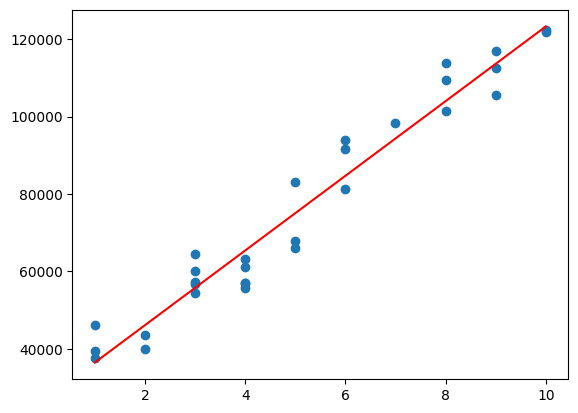

In [51]:
plt.scatter(final1.YearsExperience,final1.Salary)
plt.plot(df.YearsExperience, model.predict(df[['YearsExperience']]), color='red')
plt.show()

In [52]:
model.predict([[6]])

c:\Users\Priyanshu\OneDrive\Documents\program\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84684.75662326])

In [53]:
le = LabelEncoder()

In [56]:
dfle = df
le.fit_transform(dfle.Salary)

array([ 1,  4,  0,  3,  2,  7, 11,  5, 14, 10, 13,  6,  8,  9, 12, 16, 15,
       18, 17, 20, 19, 21, 22, 26, 24, 23, 27, 25, 29, 28])

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
ohe = OneHotEncoder()

In [70]:
X = ohe.fit_transform(df).toarray()
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(30, 70))

In [71]:
model.fit(X,df.Salary)

LinearRegression()

In [80]:
# After creating 'final1' DataFrame
model = linear_model.LinearRegression()
model.fit(final1[['YearsExperience']], final1.Salary)

# Prediction for 6 years experience
model.predict([[6]])

c:\Users\Priyanshu\OneDrive\Documents\program\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84684.75662326])